In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.7 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("bankruptcy_raw.csv")
df

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,2,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,...,0.121300,0.42002,0.85300,0,4.1486,3.2732,107.350,3.4,60.987,0
2,3,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,...,0.241140,0.81774,0.76599,0.69484,4.9909,3.951,134.270,2.7185,5.2078,0
3,4,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,5,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,...,0.134850,0.48431,0.86515,0.12444,6.3985,4.3158,127.210,2.8692,7.898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,7023,0.018371,0.4741,-0.13619,0.60839,-18.449,0.018371,0.018371,0.97203,1.0121,...,0.011909,0.039866,0.98809,0.27414,73.505,79.237,31.268,11.673,5.1489,1
7023,7024,-0.013359,0.58354,-0.02265,0.92896,-42.232,-0.013359,-0.015036,0.56289,0.98904,...,-0.011082,-0.040671,1.01110,0.80592,10.599,7.174,94.092,3.8792,1.7572,1
7024,7025,0.006338,0.50276,0.43923,1.8736,9.7417,0.006338,0.012022,0.98356,1.0083,...,0.008258,0.012817,0.99174,0,10.47,6.0759,51.019,7.1542,62.001,1
7025,7026,-0.041643,0.8481,-0.12852,0.57485,-121.92,0,-0.036795,0.17901,0.42138,...,-0.232720,-0.27429,0.98788,3.5931,39.703,3.142,261.850,1.3939,0.51005,1


/tmp/ipython-input-6-1451402866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = df['class'], data=df, palette ='Accent')


<Axes: xlabel='class', ylabel='count'>

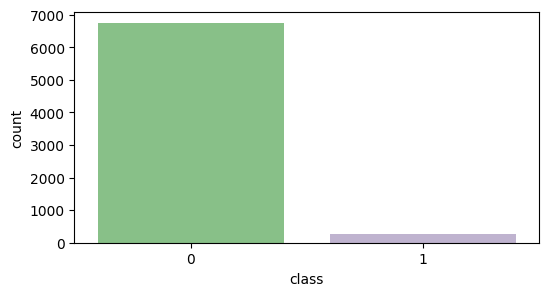

In [6]:
#finding number of bankrupt companies
plt.figure(figsize=(6,3))
sns.countplot( x = df['class'], data=df, palette ='Accent')

In [7]:
print ("Number of Bankrupted companies in given data : ", len(df[df['class'] == 1]))
print ("Number of Non-Bankrupted companies in given data : ", len(df[df['class'] == 0]))

Number of Bankrupted companies in given data :  271
Number of Non-Bankrupted companies in given data :  6756


In [8]:
print ("Number of Bankrupted companies in given data : ", len(df[df['class'] == 1]))
print ("Number of Non-Bankrupted companies in given data : ", len(df[df['class'] == 0]))

Number of Bankrupted companies in given data :  271
Number of Non-Bankrupted companies in given data :  6756


In [9]:
print ("Number of cells with Null Values : ", df.isnull().sum().sum())
print ("Number of duplicated rows in the dataset" , df.duplicated().sum())

Number of cells with Null Values :  0
Number of duplicated rows in the dataset 0


In [10]:
df.shape

(7027, 66)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      7027 non-null   int64  
 1   Attr1   7027 non-null   object 
 2   Attr2   7027 non-null   object 
 3   Attr3   7027 non-null   object 
 4   Attr4   7027 non-null   object 
 5   Attr5   7027 non-null   object 
 6   Attr6   7027 non-null   object 
 7   Attr7   7027 non-null   object 
 8   Attr8   7027 non-null   object 
 9   Attr9   7027 non-null   object 
 10  Attr10  7027 non-null   object 
 11  Attr11  7027 non-null   object 
 12  Attr12  7027 non-null   object 
 13  Attr13  7027 non-null   float64
 14  Attr14  7027 non-null   object 
 15  Attr15  7027 non-null   object 
 16  Attr16  7027 non-null   object 
 17  Attr17  7027 non-null   object 
 18  Attr18  7027 non-null   object 
 19  Attr19  7027 non-null   float64
 20  Attr20  7027 non-null   float64
 21  Attr21  7027 non-null   object 
 22  

In [12]:
df.dtypes[df.dtypes == 'int64'].index

Index(['id', 'class'], dtype='object')

In [13]:
print(df[['id','class']].value_counts())

id    class
7027  1        1
1     0        1
2     0        1
7011  1        1
7010  1        1
              ..
8     0        1
7     0        1
6     0        1
5     0        1
4     0        1
Name: count, Length: 7027, dtype: int64


In [14]:
print(df[['id','class']].value_counts())

id    class
7027  1        1
1     0        1
2     0        1
7011  1        1
7010  1        1
              ..
8     0        1
7     0        1
6     0        1
5     0        1
4     0        1
Name: count, Length: 7027, dtype: int64


In [15]:
df = df.drop(columns = "id")  # on test data also, we need to drop that column
df.shape

(7027, 65)

In [16]:
df.describe()

,Attr13,Attr19,Attr20,Attr23,Attr30,Attr31,Attr39,Attr42,Attr43,Attr44,Attr49,Attr55,Attr56,Attr58,Attr62,class
count,7027.000000,7027.000000,7.027000e+03,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7.027000e+03,7.027000e+03,7027.000000,7.027000e+03,7.027000e+03,7.027000e+03,7.027000e+03,7027.000000
mean,2.093345,0.462392,1.162128e+03,0.423610,23.568949,0.473717,0.269342,0.263638,4.588504e+03,3.426404e+03,-1.367363,8.855693e+03,-1.577367e+02,1.587409e+02,4.763202e+03,0.038566
std,159.699448,30.646874,9.315822e+04,29.742101,1826.847970,30.647711,27.064231,27.071123,3.627309e+05,2.696211e+05,107.717867,7.247527e+04,1.322125e+04,1.322124e+04,3.107835e+05,0.192571
min,-607.420000,-622.060000,0.000000e+00,-634.590000,-149.070000,-622.060000,-701.630000,-701.630000,0.000000e+00,0.000000e+00,-9001.000000,-8.004700e+05,-1.108300e+06,-4.194000e-03,0.000000e+00,0.000000
25%,0.038073,0.014812,1.708300e+01,0.011253,0.094681,0.019233,0.012786,0.011540,6.525600e+01,3.387300e+01,-0.009992,9.712000e+01,2.031450e-02,8.647650e-01,4.322250e+01,0.000000
50%,0.080830,0.049966,3.561200e+01,0.042097,0.207130,0.056637,0.046948,0.047783,9.461200e+01,5.180000e+01,0.022759,1.604800e+03,6.338200e-02,9.388100e-01,6.850900e+01,0.000000
75%,0.144955,0.104500,6.070100e+01,0.088314,0.365635,0.114970,0.103375,0.102165,1.304150e+02,7.550250e+01,0.075464,5.955900e+03,1.376950e-01,9.820150e-01,1.063350e+02,0.000000
max,13315.000000,2156.800000,7.809200e+06,2156.800000,152860.000000,2156.800000,2156.500000,2156.800000,3.039300e+07,2.258400e+07,31.639000,4.398400e+06,1.000000e+00,1.108300e+06,2.501600e+07,1.000000


In [21]:
print(df.mean().apply(lambda x: f"{x:.6f}").to_string())

Attr1      0.082358
Attr2      0.533899
Attr3      0.141406
Attr4      1.821638
Attr6      0.079521
Attr7      0.098013
Attr8      1.447578
Attr9      1.494258
Attr10     0.438608
Attr11     0.107832
Attr12     0.332179
Attr13     0.098497
Attr14     0.098013
Attr16     0.371150
Attr17     2.531570
Attr18     0.098013
Attr19     0.059481
Attr21     1.182807
Attr22     0.101847
Attr23     0.049963
Attr24     0.201054
Attr25     0.371951
Attr26     0.337908
Attr27    20.235267
Attr28     0.352011
Attr30     0.320925
Attr31     0.065879
Attr34     1.810426
Attr35     0.104597
Attr36     1.896346
Attr38     0.567410
Attr39     0.064429
Attr40     0.256778
Attr41     0.117830
Attr42     0.061052
Attr45     2.131690
Attr46     1.165751
Attr48     0.044263
Attr49     0.021969
Attr50     1.280126
Attr51     0.390450
Attr52     0.276872
Attr53     1.232190
Attr54     1.650479
Attr56     0.082960
Attr57     0.166816
Attr58     0.919213
Attr59     0.133054
class      0.009393


In [22]:
pd.options.display.float_format = '{:.6f}'.format  # Show 6 decimal places

print(df[["class", "Attr8"]].to_string())

      class      Attr8
0         0   1.330500
8         0   0.582230
12        0   1.857700
13        0   4.029000
14        0   3.732400
17        0   3.103700
25        0   2.546600
29        0  -0.112060
30        0   2.095000
31        0   0.323440
33        0   0.873550
34        0   0.299580
35        0   0.689020
42        0   2.441900
49        0   0.734550
52        0   0.985860
54        0   0.981190
55        0   1.845100
56        0   1.022100
71        0   3.975200
73        0   1.231900
77        0   1.788000
80        0   1.858800
83        0   2.286100
84        0   1.245200
85        0   0.548980
88        0   0.452440
90        0   0.321630
92        0   4.188900
101       0  -0.433770
111       0   0.762900
112       0   0.343120
119       0   2.007600
123       0   0.921590
125       0   0.253400
135       0   2.391300
138       0   1.663000
143       0   1.168700
153       0   0.562390
154       0   7.623100
157       0   1.211900
158       0   1.845100
167       0

In [18]:
# Convert all columns except 'class' to numeric, coercing errors
for col in df.columns:
    if col != 'class':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values after conversion
df.dropna(inplace=True)

# Identify columns where any value is greater than 2 after conversion
columns = [col for col in df.columns if (df[col] > 2.5).any()]

# Iterate over the identified columns and print the count of values greater than 10
for col in columns:
    print(f"{col}: {len(df[df[col] > 2.5])}")

Attr2: 2
Attr4: 511
Attr5: 1122
Attr8: 431
Attr9: 322
Attr12: 69
Attr13: 1
Attr15: 3027
Attr16: 59
Attr17: 966
Attr19: 1
Attr20: 3124
Attr21: 52
Attr24: 2
Attr26: 48
Attr27: 899
Attr28: 184
Attr29: 3194
Attr30: 12
Attr31: 1
Attr32: 3193
Attr33: 2670
Attr34: 857
Attr36: 649
Attr37: 1929
Attr40: 60
Attr41: 55
Attr42: 1
Attr43: 3194
Attr44: 3186
Attr45: 290
Attr46: 213
Attr47: 3119
Attr49: 1
Attr50: 238
Attr51: 1
Attr52: 10
Attr53: 229
Attr54: 301
Attr55: 2383
Attr57: 9
Attr59: 109
Attr60: 3093
Attr61: 3117
Attr62: 3192
Attr63: 2795
Attr64: 2222


In [26]:
columns_huge = [
    "Attr5", "Attr15", "Attr20", "Attr29", "Attr32", "Attr33", "Attr37", "Attr43",
    "Attr44", "Attr47", "Attr55", "Attr60", "Attr61", "Attr62", "Attr63", "Attr64"
]
# Identify columns to drop that are actually in the DataFrame
columns_to_drop = [col for col in columns_huge if col in df.columns]

# Drop the columns with high error in the data that exist in the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

In [27]:
columns_small = [
    'Attr12', 'Attr13', 'Attr16', 'Attr19', 'Attr2', 'Attr21', 'Attr24', 'Attr26',
    'Attr28', 'Attr30', 'Attr31', 'Attr40', 'Attr41', 'Attr42', 'Attr49', 'Attr51',
    'Attr52', 'Attr57', 'Attr59'
]
# Replacing the cells with error with the median of the feature, instead of dropping the whole column
for col in columns_small:
    df[col] = df[col].where(df[col] <= 2.5, np.nan)

df.fillna({col: df[col].median(skipna=True) for col in columns_small}, inplace=True)


In [28]:
df_bankrupted = df[df["class"]==1]
df_not_bankrupted = df[df["class"]==0]
df_bankrupted

,Attr1,Attr2,Attr3,Attr4,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,...,Attr50,Attr51,Attr52,Attr53,Attr54,Attr56,Attr57,Attr58,Attr59,class
6766,0.176510,0.784390,-0.205300,0.699720,0.030427,0.176510,0.274870,1.880500,0.215610,0.213400,...,0.609910,0.683710,0.403170,0.413360,0.572840,0.208690,0.818660,0.808030,0.385810,1
6778,-0.142120,0.771900,-0.042658,0.935940,0.000000,-0.156660,0.295500,1.007100,0.228100,-0.127660,...,0.807370,0.665860,0.684960,0.605370,0.758040,0.108080,-0.623050,0.994100,0.252190,1
6784,0.029722,0.772760,0.160660,1.393800,0.000000,0.038281,0.293860,2.147100,0.227090,0.059090,...,0.735840,0.407960,0.193870,0.526610,0.599910,0.019963,0.130880,0.972790,0.139180,1
6788,0.023079,0.558920,0.106310,1.207100,0.066523,0.032036,0.789180,1.145900,0.441080,0.058574,...,1.108700,0.513350,0.498630,1.159700,1.279500,0.123900,0.052323,0.921590,0.103310,1
6791,0.007599,0.622460,0.009781,1.096800,-0.036908,0.009503,0.606540,0.280070,0.377540,0.030144,...,0.178090,0.101070,0.508720,0.424610,0.441880,0.293100,0.020126,0.783080,0.040667,1
6826,0.005924,0.908900,0.083558,1.092200,0.000000,0.006654,0.100230,0.820830,0.091099,0.101930,...,1.089500,0.906680,1.193000,9.331700,9.563800,0.080961,0.065026,0.881670,0.024878,1
6856,0.020190,0.895980,0.026796,1.034100,0.000000,0.043174,0.116100,3.011400,0.104020,0.081127,...,0.908030,0.786780,0.268400,0.557980,1.019700,0.042514,0.194100,0.985670,0.827420,1
6872,0.068702,0.773170,0.277770,1.458000,-0.002031,0.085697,0.293370,2.081200,0.226830,0.182800,...,1.143600,0.606460,0.311420,1.959300,2.816400,0.064467,0.302880,0.914190,0.437480,1
6876,-0.009092,0.880420,0.321980,1.550500,0.000000,-0.002334,0.135690,3.675000,0.119470,0.026440,...,1.030000,0.584890,0.158610,1.282200,4.226600,0.000183,-0.076107,0.992870,2.296400,1
6881,0.000493,0.334120,0.116370,1.466000,0.000000,0.005172,1.992900,0.760200,0.665880,0.039223,...,1.095600,0.249700,0.378130,1.050400,1.062800,0.144880,0.000740,0.913450,0.011815,1


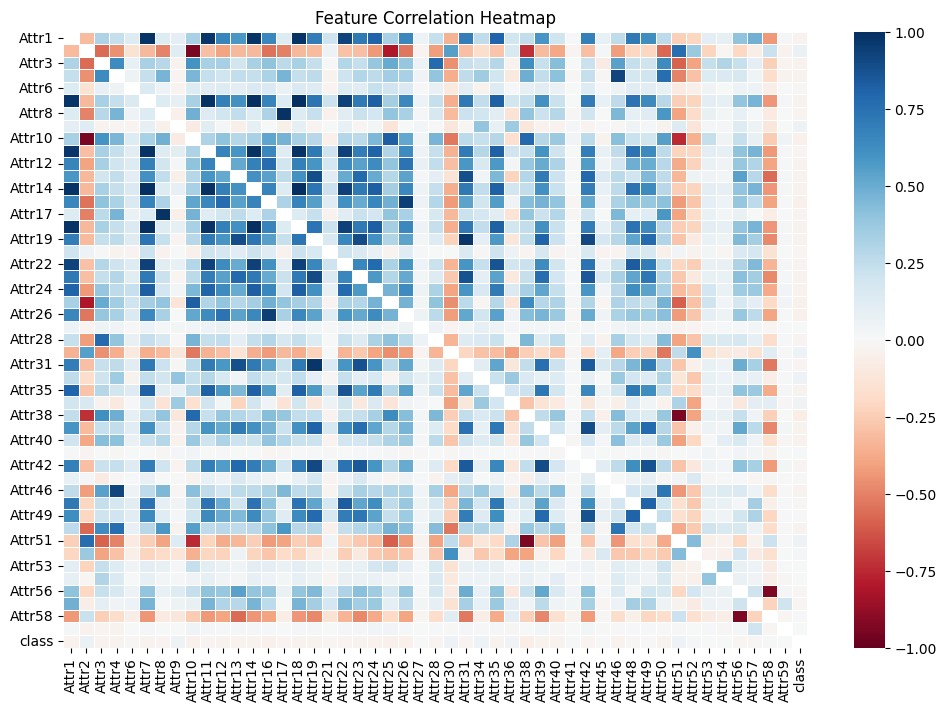

In [29]:
corr_matrix = df.corr()

# Heatmap of feature correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=np.eye(len(corr_matrix),dtype=bool), cmap='RdBu', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

In [30]:
def drop_high_corr_features(df, threshold=0.90, target='class'):
    features = df.columns
    features.drop('class')

    corr_matrix = df[features].corr().abs()
    target_corr = df[features].corrwith(df[target]).abs()

    dropped = []
    for i in range(len(features)):
        for j in range(i+1, len(features)):
            f1 = features[i]
            f2 = features[j]
            if f1 in dropped or f2 in dropped:
                continue
            if corr_matrix.loc[f1, f2] > threshold:
                if target_corr[f1] >= target_corr[f2]:
                    dropped.append(f2)
                else:
                    dropped.append(f1)

    dropped = list(set(dropped))
    new_df = df.drop(columns=dropped)
    return new_df, dropped

df, dropped = drop_high_corr_features(df, threshold=0.90, target='class')

In [31]:
dropped.extend(columns_huge)
print("Total columns dropped (high correlated columns and high data errored columns : ", len(dropped))
dropped

Total columns dropped (high correlated columns and high data errored columns :  29


['Attr10',
 'Attr18',
 'Attr11',
 'Attr8',
 'Attr16',
 'Attr7',
 'Attr4',
 'Attr42',
 'Attr31',
 'Attr14',
 'Attr58',
 'Attr22',
 'Attr51',
 'Attr5',
 'Attr15',
 'Attr20',
 'Attr29',
 'Attr32',
 'Attr33',
 'Attr37',
 'Attr43',
 'Attr44',
 'Attr47',
 'Attr55',
 'Attr60',
 'Attr61',
 'Attr62',
 'Attr63',
 'Attr64']

In [32]:
print("New DataFrame shape:", df.shape)

New DataFrame shape: (3194, 36)


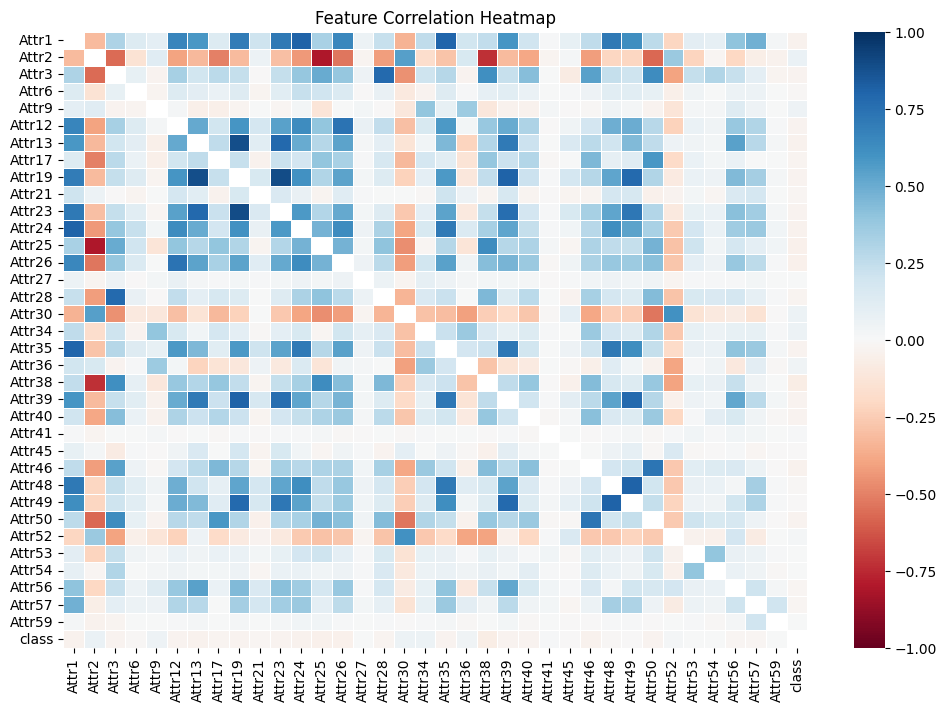

In [33]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=np.eye(len(corr_matrix),dtype=bool), cmap='RdBu', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

In [34]:
df.to_csv("df.csv")
df_bankrupted.to_csv("df_bankrupted.csv")
df_not_bankrupted.to_csv("df_not_bankrupted.csv")

# **Data Preprocessing, Model training - Various methods**

## **1**
### **Random Forest - > for FEATURE SELECTION**
### **SMOTE -> for OVERSAMPLING**
### **MODEL -> CATBoost**


In [35]:
X = df.drop(columns=['class'])
y = df['class']


# RANDOM FOREST FOR SELECTING FEATURES
def select_features_rf(X_data, y_data, top_n=20):
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_data, y_data)
    importances = rf.feature_importances_
    importance_df = pd.DataFrame({'feature': X_data.columns, 'importance': importances})
    importance_df.sort_values(by='importance', ascending=False, inplace=True)
    selected_features = importance_df.head(top_n)['feature'].tolist()
    return selected_features


selected_features = select_features_rf(X, y, top_n=20)
X_selected = X[selected_features]

# SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

# SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)


# Set class weights for CatBoost
# Calculate approximate ratio (majority/minority)
majority_count = np.sum(y_train_sm == 0)
minority_count = np.sum(y_train_sm == 1)
weight_minority = majority_count / minority_count

cat_model = CatBoostClassifier(
    depth=6,
    learning_rate=0.05,
    iterations=200,
    l2_leaf_reg=3,
    class_weights=[1, weight_minority],
    random_state=42,
    verbose=0
)

cat_model.fit(X_train_scaled, y_train_sm)



# PREDICTION AND EVALUATION
y_pred_prob = cat_model.predict_proba(X_test_scaled)[:, 1]

threshold = 0.4
y_pred = (y_pred_prob > threshold).astype("int32")

cm = confusion_matrix(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Confusion Matrix:")
print(cm)
print("\nPrecision:", np.round(prec, 4))
print("Recall:", np.round(rec, 4))
print("F1-Score:", np.round(f1, 4))
print("ROC-AUC:", np.round(roc_auc, 4))
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[603  30]
 [  5   1]]

Precision: 0.0323
Recall: 0.1667
F1-Score: 0.0541
ROC-AUC: 0.7809

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       633
           1       0.03      0.17      0.05         6

    accuracy                           0.95       639
   macro avg       0.51      0.56      0.51       639
weighted avg       0.98      0.95      0.96       639



## **2**
### **XGBoost - > for FEATURE SELECTION**
### **SMOTE -> for OVERSAMPLING**
### **MODEL -> DNN, LightGBM**

In [36]:
# Feature Selection using XGBoost
def select_features_xgb(X_data, y_data, top_n=20):
    # Train an XGBoost model to rank features
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(X_data, y_data)
    importances = xgb_model.feature_importances_
    importance_df = pd.DataFrame({'feature': X_data.columns, 'importance': importances})
    importance_df.sort_values(by='importance', ascending=False, inplace=True)
    selected_features = importance_df.head(top_n)['feature'].tolist()
    return selected_features


# DNN
def create_dnn_model(input_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model




X = df.drop(columns=['class'])
y = df['class']

selected_features = select_features_xgb(X, y, top_n=20)
print("Selected features:", selected_features)
X_selected = X[selected_features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

# SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

# Calculate class weights
majority_count = np.sum(y_train_sm == 0)
minority_count = np.sum(y_train_sm == 1)
weight_minority = majority_count / minority_count
class_weights = {0: 1, 1: weight_minority}
print("Class Weights:", class_weights)





# LightGBM Model
lgb_model = LGBMClassifier(
    random_state=42,
    learning_rate=0.05,
    n_estimators=200,
    max_depth=6
)
lgb_model.fit(X_train_scaled, y_train_sm)

# DNN Model
dnn_model = create_dnn_model(input_dim=X_train_scaled.shape[1])
dnn_model.fit(X_train_scaled, y_train_sm,
              epochs=50,
              batch_size=32,
              validation_split=0.2,
              class_weight=class_weights,
              verbose=0)




# Get predicted probabilities from each model
y_pred_lgb_prob = lgb_model.predict_proba(X_test_scaled)[:, 1]
y_pred_dnn_prob = dnn_model.predict(X_test_scaled).flatten()

# Combine predictions by averaging
combined_prob = (y_pred_lgb_prob + y_pred_dnn_prob) / 2

# Tune threshold to optimize F1-score
from sklearn.metrics import f1_score
thresholds = np.arange(0.30, 0.60, 0.01)
best_f1 = 0
best_thresh = 0.5
for thresh in thresholds:
    y_pred_temp = (combined_prob > thresh).astype("int32")
    current_f1 = f1_score(y_test, y_pred_temp)
    print(f"Threshold: {thresh:.2f}, F1-Score: {current_f1:.4f}")
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_thresh = thresh

print(f"\nBest threshold: {best_thresh:.2f} with F1-Score: {best_f1:.4f}")

# Final predictions using the best threshold
y_pred_final = (combined_prob > best_thresh).astype("int32")




# Evaluation
cm = confusion_matrix(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, combined_prob)
report = classification_report(y_test, y_pred_final)

print("\nFinal Ensemble Evaluation:")
print("Confusion Matrix:")
print(cm)
print("\nPrecision:", np.round(precision, 4))
print("Recall:", np.round(recall, 4))
print("F1-Score:", np.round(f1_final, 4))
print("ROC-AUC:", np.round(roc_auc, 4))
print("\nClassification Report:")
print(report)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Selected features: ['Attr9', 'Attr45', 'Attr49', 'Attr34', 'Attr17', 'Attr50', 'Attr1', 'Attr12', 'Attr46', 'Attr3', 'Attr57', 'Attr21', 'Attr26', 'Attr48', 'Attr38', 'Attr23', 'Attr25', 'Attr30', 'Attr6', 'Attr56']
Class Weights: {0: 1, 1: np.float64(1.0)}
[LightGBM] [Info] Number of positive: 2531, number of negative: 2531
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 5062, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Threshold: 0.30, F1-Score: 0.0000
Threshold: 0.31, F1-Score: 0.0000
Threshold: 0.32, F1-Score: 0.0000
Threshold: 0.33, F1-Score: 0.0000
Threshold: 0.34, F1-Score: 0.0000
Threshold: 0.35, F1-Score: 0.0000
Threshold: 0.36, F1-Score: 0.0000
Threshold: 0.37, F1-Score: 0.0000
Threshold: 0.38, F1-Score: 0.0000
Threshold: 0.39, F1-Score: 0.0000
Threshold: 0.40, F1-Score: 0.0000
Threshold: 0.41, F1-Score: 0.0000
Threshold: 0.42, F1-Score: 0.0000
Threshold: 0.43, F1-Score: 0.0000
Threshold: 0.44, F1-Score: 0.0000
Threshold: 0.45, F1-Score: 0.0000
Threshold: 0.46, F1-Score: 0.0000
Threshold: 0.47, F1-Score: 0.0000
Threshold: 0.48, F1-Score: 0.0000
Threshold: 0.49, F1-Score: 0.0000
Threshold: 0.50, F1-Score: 0.0000
Threshold: 0.51, F1-Score: 0.0000
Threshold: 0.52, F1-Score: 0.0000
Threshold: 0.53, F1-Score: 0.0000
Threshold: 0.54, F1-Score: 0.0000
Threshold: 0.55, F1-Score: 0.0000
Threshold: 0.56, F1-Score: 0.0000
Threshold: 0.57, F1-Score: 0.0000
Threshold: 0.58, F1-Score: 0.0000
Threshold: 0.5

## **Final**
### **ANOVA-> Feature selection**
### **SMOTE -> for OVERSAMPLING****
### **DNN , Gaussian Model-> TRAINING model**

In [37]:
# Feature Selection using ANOVA F-test
def select_features_anova(X_data, y_data, top_n=30):

    selector = SelectKBest(score_func=f_classif, k=top_n)
    selector.fit(X_data, y_data)
    mask = selector.get_support()
    selected_features = X_data.columns[mask].tolist()
    return selected_features


In [38]:
# developing DNN MODEL
from tensorflow.keras.layers import BatchNormalization

def create_dnn_model(input_dim):

    inputs = Input(shape=(input_dim,))
    x = Dense(256, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

    return model

In [39]:
X = df.drop(columns=['class'])
y = df['class']

selected_features = select_features_anova(X, y, top_n=30)
X_selected = X[selected_features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)


In [42]:
# SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

In [40]:
# Class weights based
majority_count = np.sum(y_train_sm == 0)
minority_count = np.sum(y_train_sm == 1)
weight_minority = majority_count / minority_count
class_weights = {0: 1, 1: weight_minority}
print("Class Weights:", class_weights)


# TRAIN MODELS
# Gaussian Modelling
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train_sm)

# DNN Model
dnn_model = create_dnn_model(input_dim=X_train_scaled.shape[1])
dnn_model.fit(X_train_scaled, y_train_sm,
              epochs=200,
              batch_size=64,
              validation_split=0.2,
              class_weight=class_weights,
              verbose=0)

Class Weights: {0: 1, 1: np.float64(1.0)}


In [ ]:
# Ensemble Predictions
# Get predicted probabilities from each model
y_pred_gnb_prob = gnb_model.predict_proba(X_test_scaled)[:, 1]
y_pred_dnn_prob = dnn_model.predict(X_test_scaled).flatten()


# Combine predictions by averaging probabilities (soft voting)
combined_prob = (y_pred_gnb_prob + y_pred_dnn_prob) / 2


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [43]:
# Tune threshold
thresholds = np.arange(0.30, 0.60, 0.01)
best_f1 = 0
best_thresh = 0.5
for thresh in thresholds:
    y_pred_temp = (combined_prob > thresh).astype("int32")
    current_f1 = f1_score(y_test, y_pred_temp)
    print(f"Threshold: {thresh:.2f}, F1-Score: {current_f1:.4f}")
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_thresh = thresh

print(f"\nBest threshold: {best_thresh:.2f} with F1-Score: {best_f1:.4f}")
# Final predictions using the best threshold
y_pred_final = (combined_prob > best_thresh).astype("int32")

Threshold: 0.30, F1-Score: 0.0000
Threshold: 0.31, F1-Score: 0.0000
Threshold: 0.32, F1-Score: 0.0000
Threshold: 0.33, F1-Score: 0.0000
Threshold: 0.34, F1-Score: 0.0000
Threshold: 0.35, F1-Score: 0.0000
Threshold: 0.36, F1-Score: 0.0000
Threshold: 0.37, F1-Score: 0.0000
Threshold: 0.38, F1-Score: 0.0000
Threshold: 0.39, F1-Score: 0.0000
Threshold: 0.40, F1-Score: 0.0000
Threshold: 0.41, F1-Score: 0.0000
Threshold: 0.42, F1-Score: 0.0000
Threshold: 0.43, F1-Score: 0.0000
Threshold: 0.44, F1-Score: 0.0000
Threshold: 0.45, F1-Score: 0.0000
Threshold: 0.46, F1-Score: 0.0000
Threshold: 0.47, F1-Score: 0.0000
Threshold: 0.48, F1-Score: 0.0000
Threshold: 0.49, F1-Score: 0.0000
Threshold: 0.50, F1-Score: 0.0000
Threshold: 0.51, F1-Score: 0.0000
Threshold: 0.52, F1-Score: 0.0000
Threshold: 0.53, F1-Score: 0.0000
Threshold: 0.54, F1-Score: 0.0000
Threshold: 0.55, F1-Score: 0.0000
Threshold: 0.56, F1-Score: 0.0000
Threshold: 0.57, F1-Score: 0.0000
Threshold: 0.58, F1-Score: 0.0000
Threshold: 0.5

In [44]:
# prompt: can you save the models used in this code in the current directory

import joblib
import os

# Save the trained models to the current directory
# Assuming the last trained models are the ones from the "Final" section

# Ensure the current directory exists (usually it's /content/ in Colab)
if not os.path.exists('.'):
    os.makedirs('.')

# Save the GaussianNB model
try:
    joblib.dump(gnb_model, 'gnb_model.pkl')
    print("GaussianNB model saved successfully as 'gnb_model.pkl'")
except NameError:
    print("GaussianNB model 'gnb_model' not found. It might not have been trained yet.")
except Exception as e:
    print(f"Error saving GaussianNB model: {e}")

# Save the Keras DNN model
# Keras models are usually saved using model.save() or save_weights()
try:
    dnn_model.save('dnn_model.h5') # Use .h5 or a directory
    print("DNN model saved successfully as 'dnn_model.h5'")
except NameError:
    print("DNN model 'dnn_model' not found. It might not have been trained yet.")
except Exception as e:
    print(f"Error saving DNN model: {e}")


# If you also want to save models from other sections, repeat the process.
# For example, to save the CatBoost model:
try:
    # CatBoost has its own save method
    cat_model.save_model('catboost_model.cbm')
    print("CatBoost model saved successfully as 'catboost_model.cbm'")
except NameError:
    print("CatBoost model 'cat_model' not found. It might not have been trained yet.")
except Exception as e:
    print(f"Error saving CatBoost model: {e}")

# To save the LightGBM model:
try:
    joblib.dump(lgb_model, 'lgbm_model.pkl')
    print("LightGBM model saved successfully as 'lgbm_model.pkl'")
except NameError:
    print("LightGBM model 'lgb_model' not found. It might not have been trained yet.")
except Exception as e:
    print(f"Error saving LightGBM model: {e}")

# Note: The original script defines `dnn_model` twice. The second definition
# (in the "Final" section) will overwrite the first one (in the "2" section).
# The saving code above will save the *last* defined `dnn_model`, which is
# the one from the "Final" section.

# List files in the current directory to verify
!ls -lh *.pkl *.h5 *.cbm


GaussianNB model saved successfully as 'gnb_model.pkl'
DNN model saved successfully as 'dnn_model.h5'
CatBoost model saved successfully as 'catboost_model.cbm'
LightGBM model saved successfully as 'lgbm_model.pkl'
-rw-r--r-- 1 root root 228K Jul  2 13:56 catboost_model.cbm
-rw-r--r-- 1 root root 620K Jul  2 13:56 dnn_model.h5
-rw-r--r-- 1 root root 1.4K Jul  2 13:56 gnb_model.pkl
-rw-r--r-- 1 root root 634K Jul  2 13:56 lgbm_model.pkl


In [45]:
# EVALUATION
cm = confusion_matrix(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, combined_prob)
report = classification_report(y_test, y_pred_final)

print("\nFinal Ensemble Evaluation (GaussianNB + DNN):")
print("Confusion Matrix:")
print(cm)
print("\nPrecision:", np.round(precision, 4))
print("Recall:", np.round(recall, 4))
print("F1-Score:", np.round(f1_final, 4))
print("ROC-AUC:", np.round(roc_auc, 4))
print("\nClassification Report:")
print(report)


Final Ensemble Evaluation (GaussianNB + DNN):
Confusion Matrix:
[[632   1]
 [  6   0]]

Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.7285

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       633
           1       0.00      0.00      0.00         6

    accuracy                           0.99       639
   macro avg       0.50      0.50      0.50       639
weighted avg       0.98      0.99      0.99       639

